In [10]:
import os
import torch
import torchvision
from model import UNet
from diffusion import Diffusion
from utils import plot_images,save_images
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
device="cuda"


In [12]:
def load_model(run_name,device):
    model=UNet(num_classes=10,device=device).to(device)
    model_weights_path=os.path.join("models",run_name,"ema_ckpt.pt")

    if os.path.exists(model_weights_path):
        print("Loading model weights...")
        model.load_state_dict(torch.load(model_weights_path))
        model.eval()
    else:
        raise FileNotFoundError(f"no weights found at {model_weights_path}")
    return model


In [13]:
def generate_images(model,diffusion,n=10,cfg_scale=3):
    labels=torch.arange(n).long().to(device)
    sampled_images=diffusion.sample(model,n,labels,cfg_scale=cfg_scale)
    plot_images(sampled_images)

    save_images(sampled_images,os.path.join("results","generated_ema_images.jpg"))
    

In [14]:
def generate_images_by_class(model,diffusion,class_label,n=1,cfg_scale=3):
    print("Generating {n} images for class {class_label}...")
    labels=torch.full((n,),class_label).long().to(device)
    sampled_images=diffusion.sample(model,n,labels,cfg_scale=cfg_scale)

    plot_images(sampled_images)
    save_images(sampled_images,os.path.join("results",f"class_{class_label}_generated_images.jpg"))
    

In [15]:
run_name="DDPM_conditional"
model=load_model(run_name,device)
diffusion=Diffusion(img_size=64,device=device)


Loading model weights...


01:53:59 - INFO: Sampling 10 new images....
999it [03:19,  5.00it/s]


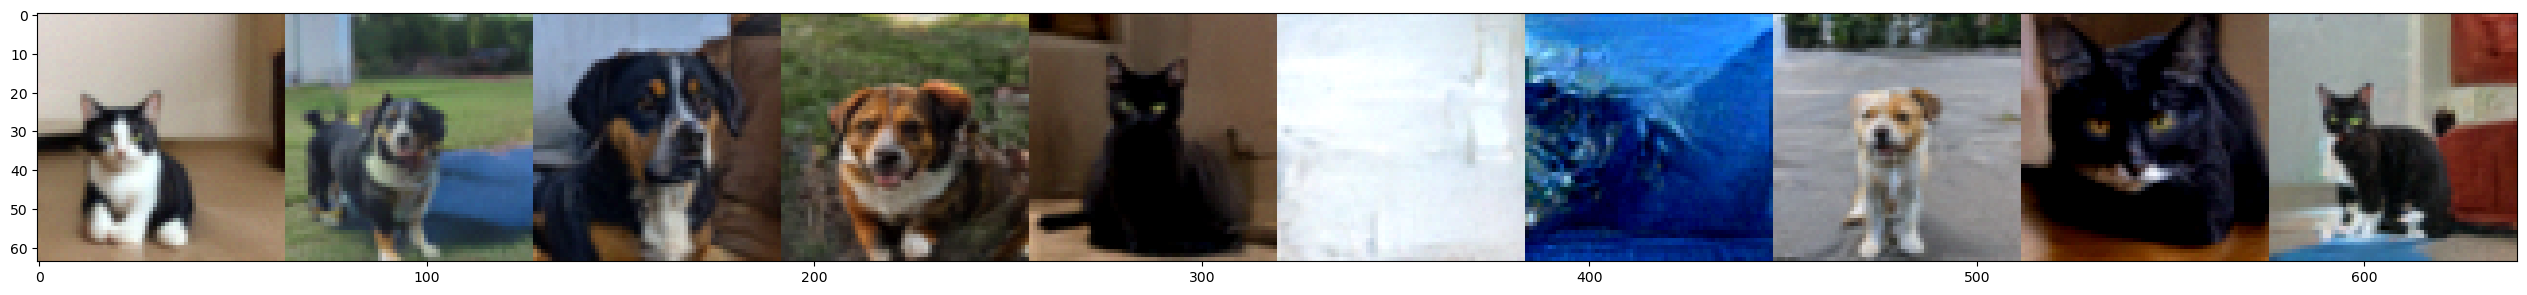

In [16]:
generate_images(model,diffusion,n=10)


02:06:00 - INFO: Sampling 5 new images....


Generating {n} images for class {class_label}...


999it [01:45,  9.49it/s]


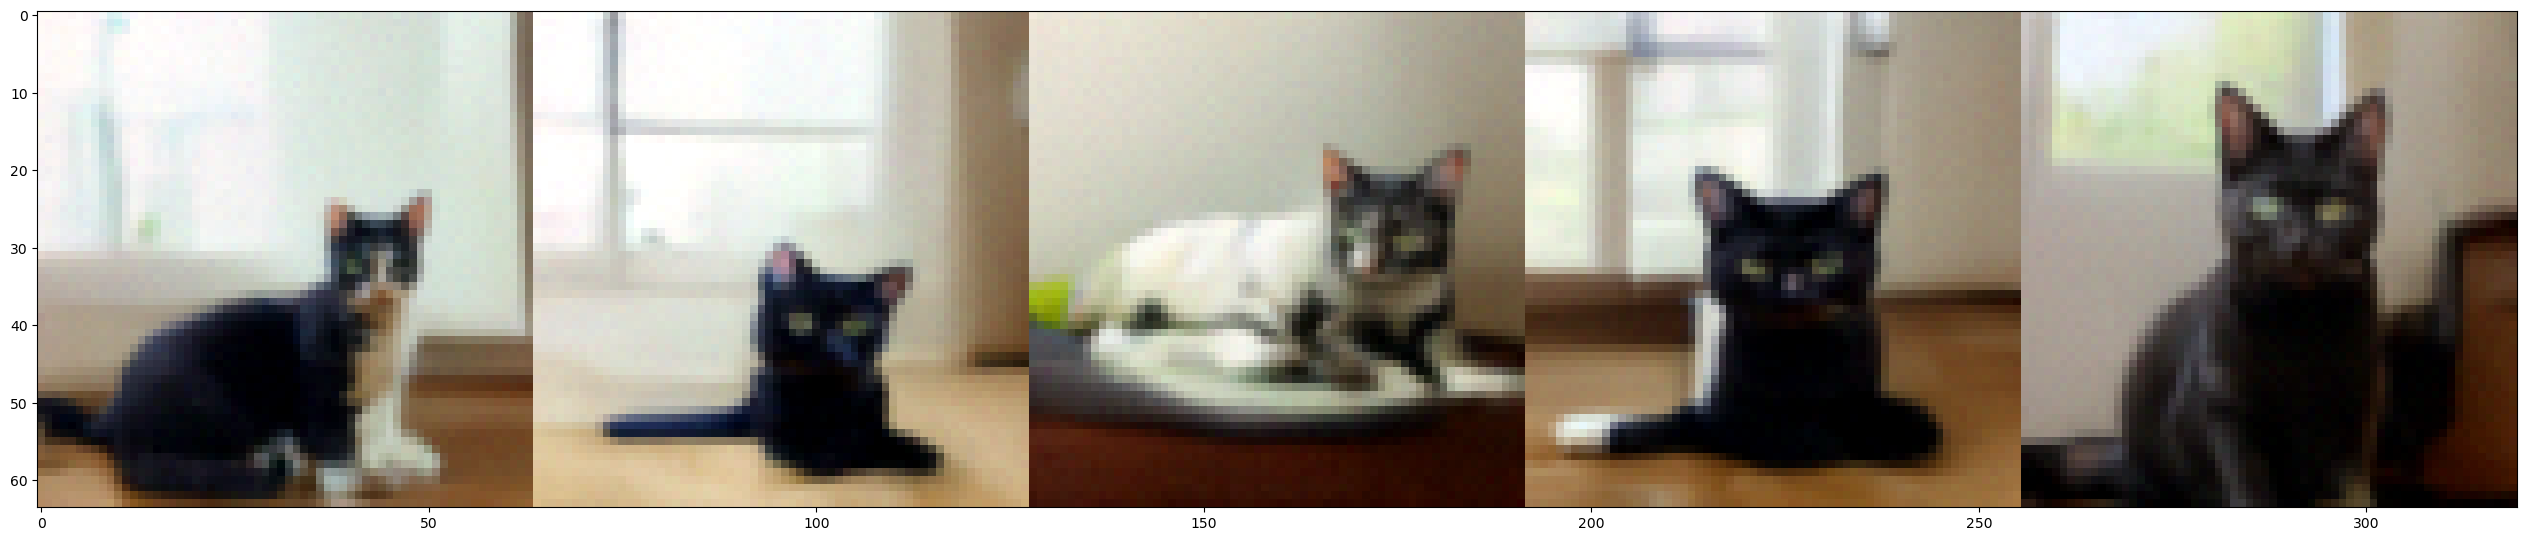

In [20]:
generate_images_by_class(model,diffusion,class_label=0,n=5)